In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('covid19.csv')

In [3]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [5]:
df.shape

(23688, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [7]:
df['Date']= pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


In [9]:
df.isnull().any()

Date         False
Country      False
Confirmed    False
Recovered    False
Deaths       False
dtype: bool

In [10]:
df   #It is a Time-Series Data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [11]:
df["Date"].dt.month  # Changing into Pandas Date Format

0        1
1        1
2        1
3        1
4        1
        ..
23683    5
23684    5
23685    5
23686    5
23687    5
Name: Date, Length: 23688, dtype: int64

### EDA 

In [72]:
#Function to plot Pie Chart
def dict_2_pie_chart(data):
    labels = []
    sizes = []

    for x, y in data.items():
        labels.append(x)
        sizes.append(y)
    plt.figure(figsize=(20, 20))
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  
    plt.show()

In [73]:
new_df = df.groupby(['Country']).sum().reset_index()  #Grouping the Data by Countries

In [74]:
new_df[['Country','Confirmed']].sort_values(by=['Confirmed'], ascending= [False])[:9] # Top 10 Confirmed Cases countries

,Country,Confirmed
174,US,57098767
85,Italy,11896347
158,Spain,11890691
178,United Kingdom,9150537
66,Germany,9046257
36,China,8871610
62,France,8746538
140,Russia,7459042
23,Brazil,6701409


<Figure size 1440x1440 with 0 Axes>

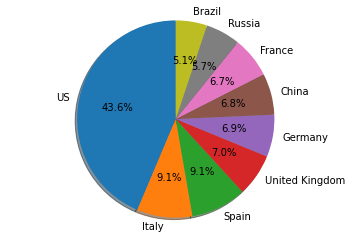

In [76]:
dict_2_pie_chart(dict(new_df[['Country','Confirmed']].sort_values(by=['Confirmed'], ascending= [False])[:9].values))

Top 10 Confirmed Cases among Countries in percentage

In [17]:
new_df[['Country','Deaths']].sort_values(by=['Deaths'], ascending= [False])[:9]

,Country,Deaths
174,US,3221969
85,Italy,1568276
178,United Kingdom,1329006
158,Spain,1302010
62,France,1209634
23,Brazil,438199
36,China,384657
16,Belgium,362702
81,Iran,352960


<Figure size 1080x1080 with 0 Axes>

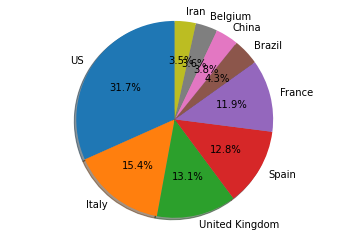

In [18]:
dict_2_pie_chart(dict(new_df[['Country','Deaths']].sort_values(by=['Deaths'], ascending= [False])[:9].values))

Death Percentage in Top 10 Countries

In [19]:
new_df[['Country','Recovered']].sort_values(by=['Recovered'], ascending= [False])[:9]

,Country,Recovered
174,US,8428678
36,China,6776464
66,Germany,6102898
158,Spain,5770271
85,Italy,4354815
81,Iran,3973261
173,Turkey,2895790
23,Brazil,2666743
62,France,2519190


<Figure size 1080x1080 with 0 Axes>

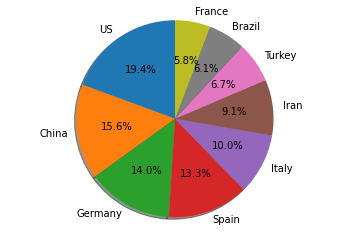

In [35]:
dict_2_pie_chart(dict(new_df[['Country','Recovered']].sort_values(by=['Recovered'], ascending= [False])[:9].values))

Fig: Recovery Percentage in Top 10 Countries

Note from the 3 Pie Charts: 
1. We have observed the US has the Highest number of Confirmed cases, recovery as well as Death. 
2. Moreover US is followed by Italy in 2nd highest Deaths even though less Confirmed Cases.
3. China and Germany also has High recovery rates even if confirmed cases are low according to the Data

In [36]:
df['MonthNumber'] = list(df.loc[:, "Date"].dt.month)

In [39]:
new_df2 = df.groupby(['MonthNumber']).sum().reset_index()

In [37]:
import calendar

In [40]:
new_df2['MonthName'] = new_df2['MonthNumber'].apply(lambda x: calendar.month_name[x])

In [41]:
new_df2.columns

Index(['MonthNumber', 'Confirmed', 'Recovered', 'Deaths', 'monthNumber',
       'MonthName'],
      dtype='object')

In [42]:
new_df3 = new_df2[['MonthName', 'Confirmed', 'Recovered', 'Deaths']]

In [43]:
new_df3

,MonthName,Confirmed,Recovered,Deaths
0,January,38534,844,889
1,February,1671783,380794,46898
2,March,8899917,2706089,396863
3,April,63046693,16322390,4291044
4,May,115121451,41747602,7746343


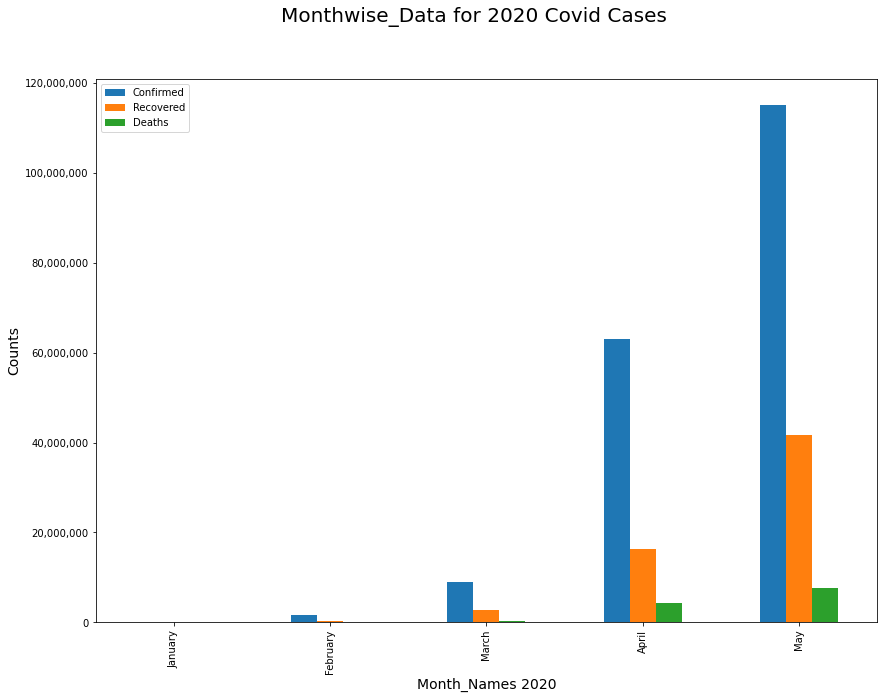

In [44]:
ax = new_df3.plot(x = 'MonthName', y = ['Confirmed', 'Recovered', 'Deaths'], kind = 'bar', figsize = (14,10))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.suptitle('Monthwise_Data for 2020 Covid Cases',size=20)
plt.xlabel("Month_Names 2020", size=14)
plt.ylabel("Counts", size=14)
plt.show()

In [47]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths', 'monthNumber',
       'monthName', 'MonthNumber', 'MonthName'],
      dtype='object')

In [49]:
df = df.drop(columns= ['monthNumber','monthName', 'MonthNumber', 'MonthName'],axis=0)

In [52]:
time_series = df.groupby('Date').sum().reset_index()   # Grouping the Data by Date

In [56]:
time_series.shape

(126, 4)

In [57]:
time_series      # 126 unique Days in the Data

,Date,Confirmed,Recovered,Deaths
0,2020-01-22,555,28,17
1,2020-01-23,654,30,18
2,2020-01-24,941,36,26
3,2020-01-25,1434,39,42
4,2020-01-26,2118,52,56
...,...,...,...,...
121,2020-05-22,5210817,2056643,338160
122,2020-05-23,5310362,2112185,342097
123,2020-05-24,5407613,2168563,345059
124,2020-05-25,5495061,2231738,346232


In [59]:
time_series.columns

Index(['Date', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [62]:
time_series['Recovery_Rate'] = time_series['Recovered']*100/time_series['Confirmed'] # Calculating Recovery Rate

In [63]:
time_series['Mortality_Rate'] = time_series['Deaths']*100/time_series['Confirmed']   # Calculating Mortality Rate

In [64]:
time_series

,Date,Confirmed,Recovered,Deaths,Recovery_Rate,Mortality_Rate
0,2020-01-22,555,28,17,5.045045,3.063063
1,2020-01-23,654,30,18,4.587156,2.752294
2,2020-01-24,941,36,26,3.825717,2.763018
3,2020-01-25,1434,39,42,2.719665,2.928870
4,2020-01-26,2118,52,56,2.455146,2.644004
...,...,...,...,...,...,...
121,2020-05-22,5210817,2056643,338160,39.468724,6.489577
122,2020-05-23,5310362,2112185,342097,39.774784,6.442066
123,2020-05-24,5407613,2168563,345059,40.102038,6.380985
124,2020-05-25,5495061,2231738,346232,40.613525,6.300785


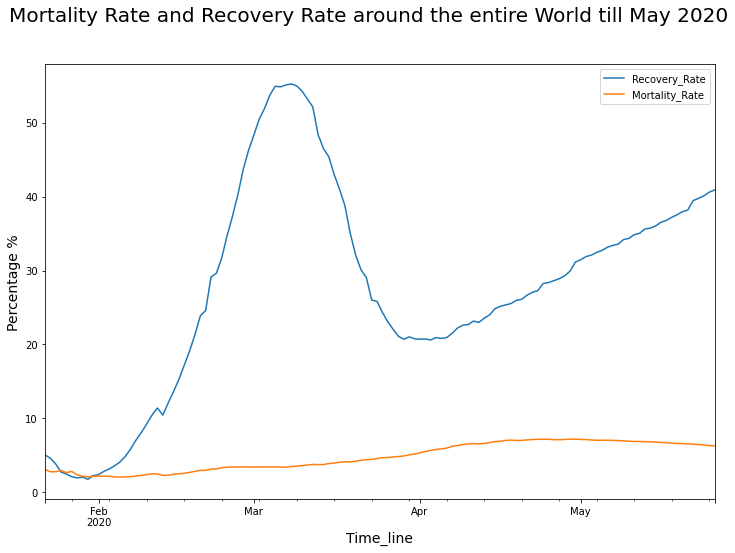

In [71]:
tm_plt = time_series[['Date','Recovery_Rate','Mortality_Rate']].plot(x = 'Date',figsize = (12,8))
tm_plt.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.suptitle("Mortality Rate and Recovery Rate around the entire World till May 2020", size = 20)
plt.xlabel("Time_line", size=14)
plt.ylabel("Percentage %", size=14)
plt.show()

One Interesting pattern we can see across the time-span of 5 months is that the Mortality rate has been increasing slightly each month but the Recovery rate reached it's peak in March followed by a drastic decline and then again increasing gradually from April's ending.